In [2]:
#import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import chi2_contingency 
import warnings 
warnings.filterwarnings('ignore')

#import project confiuration
import sys
sys.path.append('..')
import config

#set visualization style
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Set random seed
np.random.seed(config.RANDOM_SEED)

print("Libraries imported successfully")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Configuration loaded successfully!
Project root: C:\Users\hp\Desktop\gaf\Ghana-Armed-Forces-Personnel-Deployment-and-Attrition-Risk-Modeling
Random seed: 42
Target sample size: 1000 personnel
Libraries imported successfully
Matplotlib version: 3.7.2
Seaborn version: 0.12.2


# Load Data 

In [3]:
#load the dataset 
data_path = config.RAW_DATA_DIR/ config.PERSONNEL_DATA_FILE
df = pd.read_csv(data_path)

df['contract_end_data'] = pd.to_datetime(df['contract_end_date'])

print(f"Data loaded successfully")
print(f"Shape: {df.shape}")
print(f"\n Some rows")
df.head()

Data loaded successfully
Shape: (1000, 52)

 Some rows


,personnel_id,name,age,gender,service_branch,rank,MOS,years_of_service,contract_end_date,marital_status,...,peer_rating_score,civilian_job_offers,financial_stress_indicator,family_support_score,relocation_willingness,attrition_risk_score,attrition_risk,readiness_score,readiness_category,contract_end_data
0,MIL00001,Allison Hill,35,Male,Army,Officer,Military Police,18,2026-09-22,Single,...,81.3,0.0,Low,95.6,Low,0.000000,NaN,62.0,Not Ready,2026-09-22
1,MIL00002,Noah Rhodes,23,Female,Army,Junior,Cyber Operations,2,2025-03-01,Divorced,...,NaN,0.0,Low,24.6,High,34.614493,LOW_RISK,70.9,Limited,2025-03-01
2,MIL00003,Angie Henderson,29,Male,Army,Junior,Special Forces,5,2027-01-20,Married,...,73.8,0.0,Low,61.7,Medium,0.000000,NaN,67.3,Not Ready,2027-01-20
3,MIL00004,Daniel Wagner,20,Male,Air Force,Junior,Aviation,5,2028-08-12,Married,...,79.3,1.0,Medium,69.3,Medium,25.940718,LOW_RISK,73.4,Limited,2028-08-12
4,MIL00005,Cristian Santos,21,Female,Navy,Junior,Administration,1,2027-01-20,Married,...,NaN,NaN,Low,38.7,Low,19.649121,LOW_RISK,76.0,Limited,2027-01-20


In [4]:
#info 
print("Dataset Information")
print("-"*60)
df.info()

Dataset Information
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   personnel_id                    1000 non-null   object        
 1   name                            1000 non-null   object        
 2   age                             1000 non-null   int64         
 3   gender                          1000 non-null   object        
 4   service_branch                  1000 non-null   object        
 5   rank                            1000 non-null   object        
 6   MOS                             1000 non-null   object        
 7   years_of_service                1000 non-null   int64         
 8   contract_end_date               1000 non-null   object        
 9   marital_status                  1000 non-null   object      

In [7]:
#summary 
print("\nNumeric Feature Summary")
print("-"*60)
df.describe().round(3).T


Numeric Feature Summary
------------------------------------------------------------


,count,mean,min,25%,50%,75%,max,std
age,1000.0,29.409,18.0,24.0,28.0,35.0,54.0,7.889
years_of_service,1000.0,8.296,0.0,3.0,6.0,12.0,29.0,6.615
dependents,1000.0,2.505,0.0,1.0,2.5,4.0,5.0,1.701
months_until_contract_end,1000.0,24.285,1.0,13.0,25.0,35.0,47.0,13.244
total_training_hours,1000.0,659.587,0.0,256.75,549.5,998.75,2000.0,523.211
specialized_courses_completed,1000.0,4.607,0.0,2.0,4.0,7.0,15.0,3.347
training_score_average,1000.0,80.082,60.0,73.6,79.9,86.7,100.0,9.398
certifications_held,1000.0,3.485,0.0,2.0,3.0,5.0,8.0,1.93
days_since_last_training,1000.0,355.991,2.0,170.75,348.5,548.5,729.0,212.171
training_budget_spent,1000.0,9442.117,0.0,4075.5,8280.0,13155.0,34622.0,7133.439


# Demographic Analysis

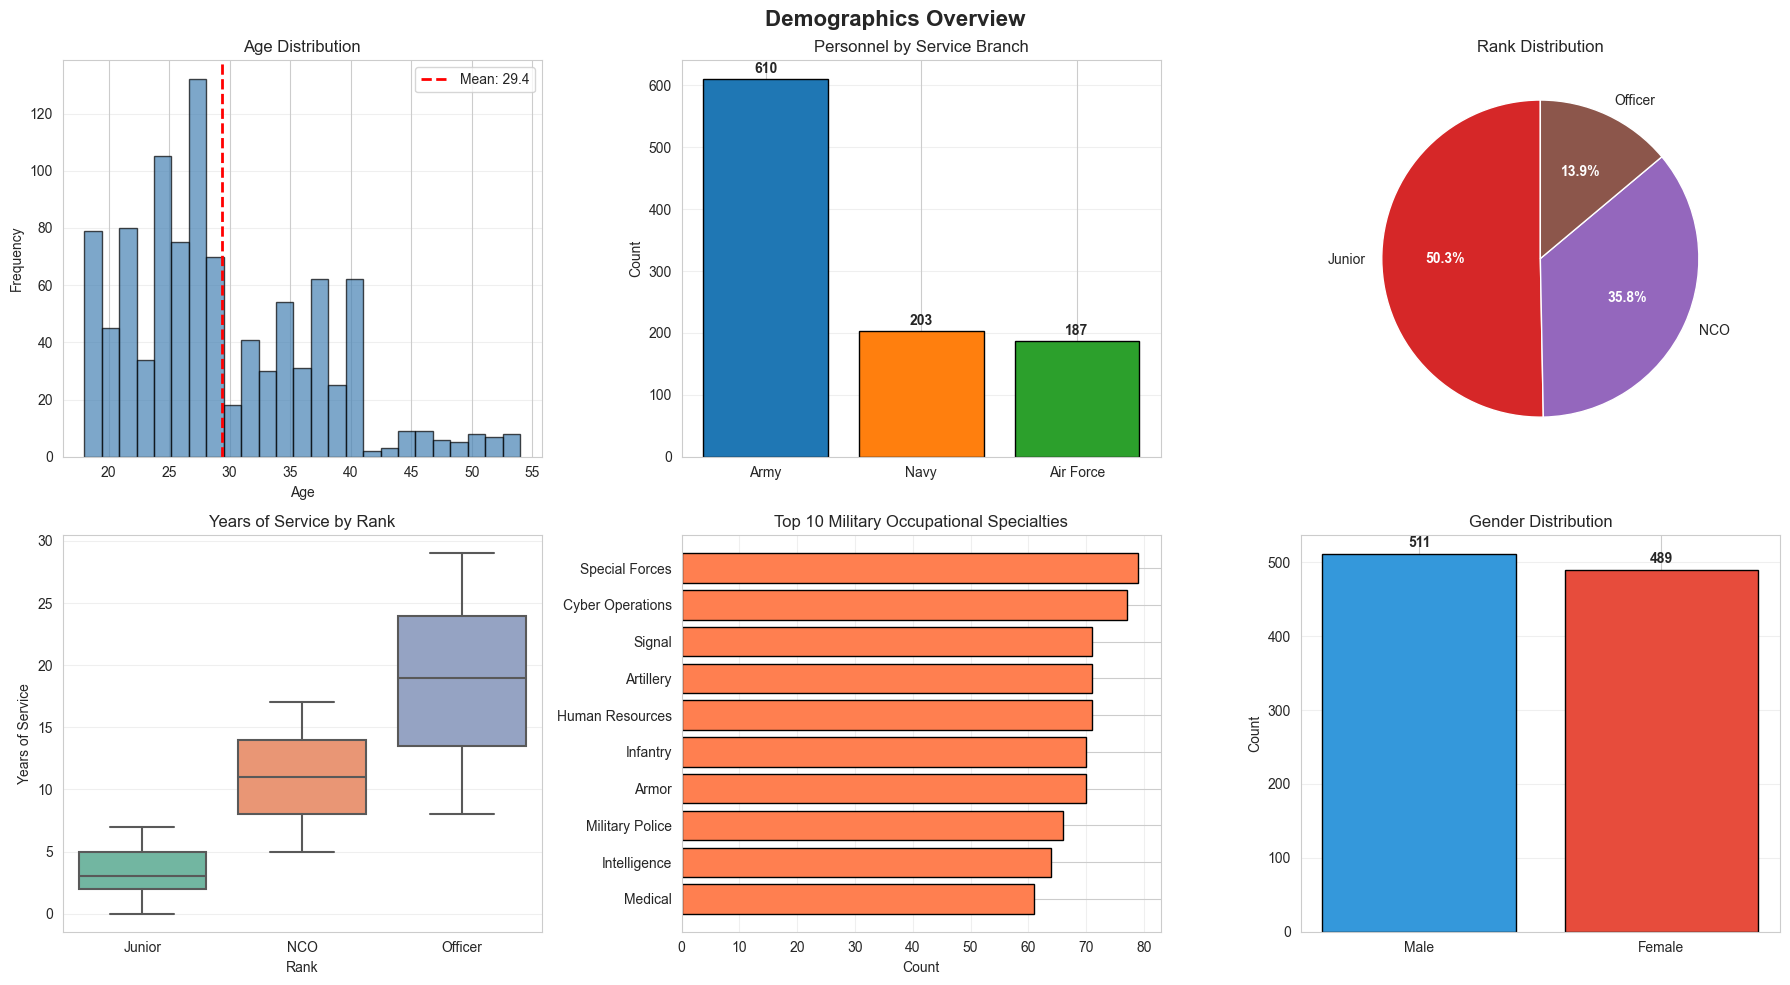

In [12]:
#create demography overview
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Demographics Overview', fontsize=16, fontweight='bold')

# 1. Age distribution
axes[0, 0].hist(df['age'], bins=25, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["age"].mean():.1f}')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Service branch distribution
branch_counts = df['service_branch'].value_counts()
colors_branch = ['#1f77b4', '#ff7f0e', '#2ca02c']
axes[0, 1].bar(branch_counts.index, branch_counts.values, color=colors_branch, edgecolor='black')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Personnel by Service Branch')
for i, v in enumerate(branch_counts.values):
    axes[0, 1].text(i, v + 10, str(v), ha='center', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Rank distribution
rank_counts = df['rank'].value_counts()
colors_rank = ['#d62728', '#9467bd', '#8c564b']
wedges, texts, autotexts = axes[0, 2].pie(rank_counts.values, labels=rank_counts.index, 
                                            autopct='%1.1f%%', colors=colors_rank, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
axes[0, 2].set_title('Rank Distribution')

# 4. Years of service by rank (boxplot)
rank_order = ['Junior', 'NCO', 'Officer']
df['rank_ordered'] = pd.Categorical(df['rank'], categories=rank_order, ordered=True)
df_plot = df.sort_values('rank_ordered')
sns.boxplot(data=df_plot, x='rank_ordered', y='years_of_service', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_xlabel('Rank')
axes[1, 0].set_ylabel('Years of Service')
axes[1, 0].set_title('Years of Service by Rank')
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Top 10 MOS
mos_counts = df['MOS'].value_counts().head(10)
axes[1, 1].barh(range(len(mos_counts)), mos_counts.values, color='coral', edgecolor='black')
axes[1, 1].set_yticks(range(len(mos_counts)))
axes[1, 1].set_yticklabels(mos_counts.index)
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_title('Top 10 Military Occupational Specialties')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

# 6. Gender distribution
gender_counts = df['gender'].value_counts()
axes[1, 2].bar(gender_counts.index, gender_counts.values, color=['#3498db', '#e74c3c'], edgecolor='black')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('Gender Distribution')
for i, v in enumerate(gender_counts.values):
    axes[1, 2].text(i, v + 10, str(v), ha='center', fontweight='bold')
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(config.FIGURES_DIR / 'eda_demographics.png', dpi=300, bbox_inches='tight')
plt.show()



In [13]:
#demographics summary statistics
print("\nDemographics Summary:")
print("-" * 60)
print(f"Average Age: {df['age'].mean():.1f} years (σ={df['age'].std():.1f})")
print(f"Average Years of Service: {df['years_of_service'].mean():.1f} years")
print(f"\nService Branch Breakdown:")
print(df['service_branch'].value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))
print(f"\nRank Breakdown:")
print(df['rank'].value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))
print(f"\nGender Breakdown:")
print(df['gender'].value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))


Demographics Summary:
------------------------------------------------------------
Average Age: 29.4 years (σ=7.9)
Average Years of Service: 8.3 years

Service Branch Breakdown:
service_branch
Army         61.0%
Navy         20.3%
Air Force    18.7%
Name: proportion, dtype: object

Rank Breakdown:
rank
Junior     50.3%
NCO        35.8%
Officer    13.9%
Name: proportion, dtype: object

Gender Breakdown:
gender
Male      51.1%
Female    48.9%
Name: proportion, dtype: object


# Attrintion Risk Analysis 

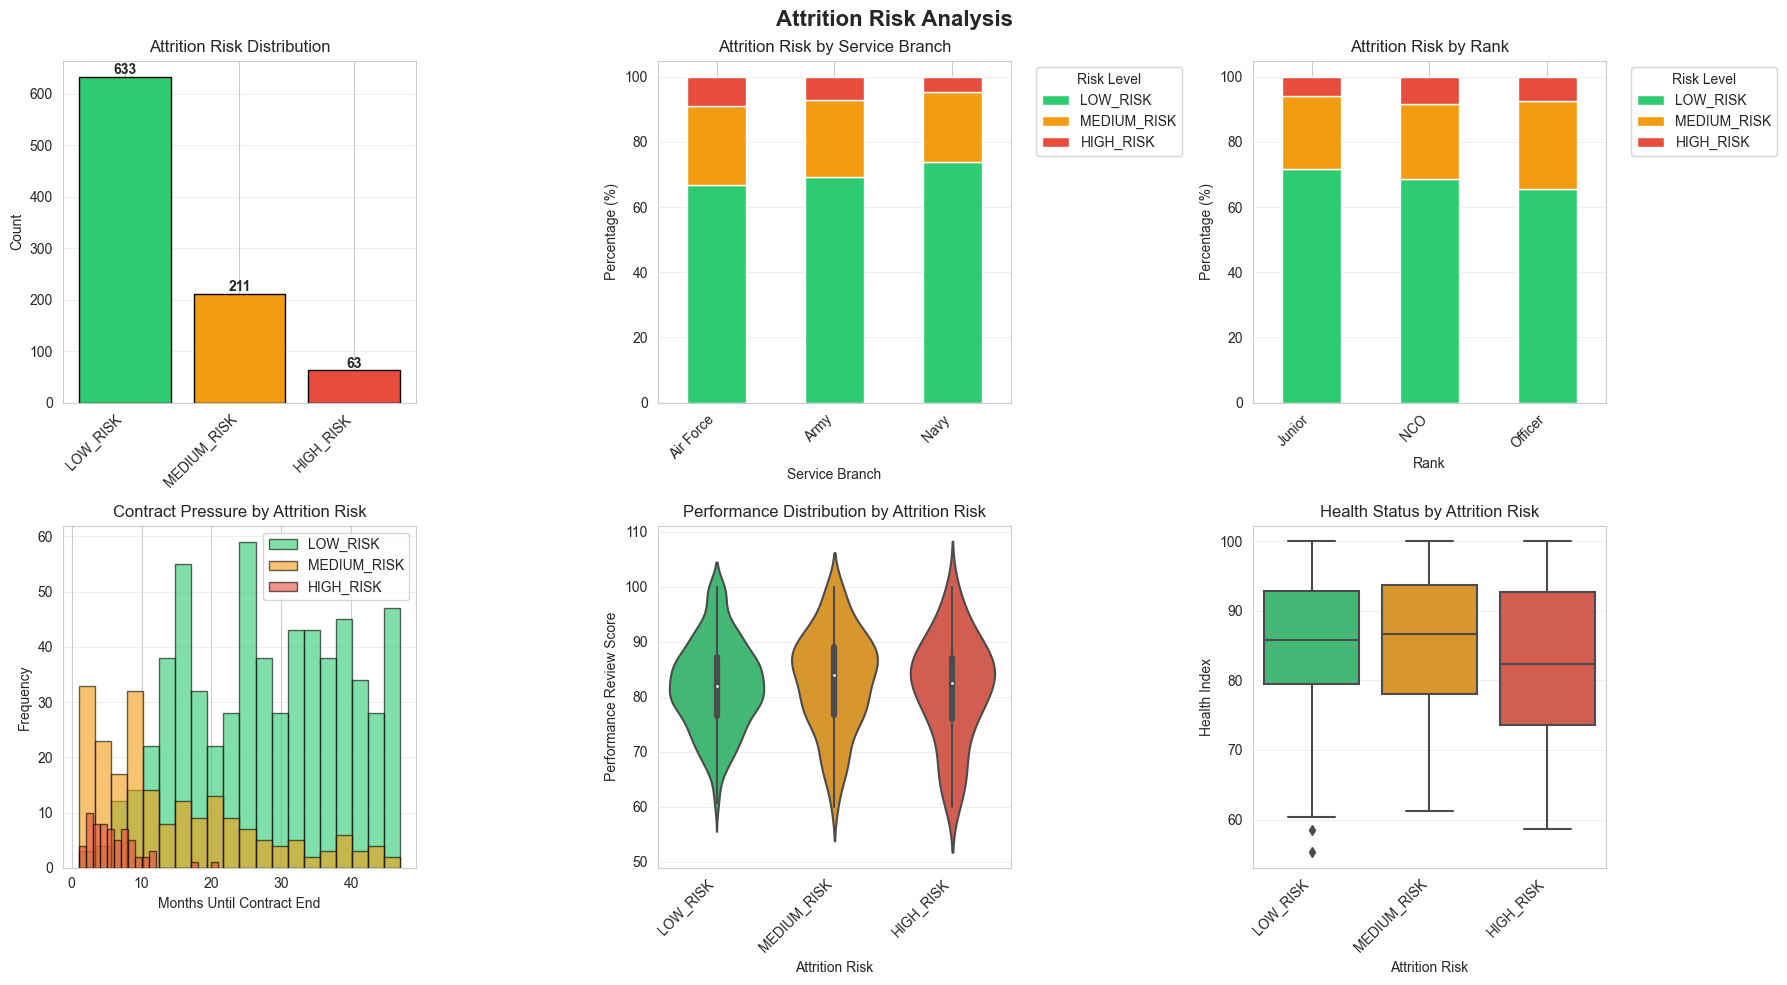

In [14]:
# Comprehensive attrition analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Attrition Risk Analysis', fontsize=16, fontweight='bold')

# 1. Attrition risk distribution
attrition_counts = df['attrition_risk'].value_counts()
colors_attrition = [config.ATTRITION_COLORS[risk] for risk in attrition_counts.index]
axes[0, 0].bar(range(len(attrition_counts)), attrition_counts.values, color=colors_attrition, edgecolor='black')
axes[0, 0].set_xticks(range(len(attrition_counts)))
axes[0, 0].set_xticklabels(attrition_counts.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Attrition Risk Distribution')
for i, v in enumerate(attrition_counts.values):
    axes[0, 0].text(i, v + 5, str(v), ha='center', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Attrition risk by service branch
attrition_branch = pd.crosstab(df['service_branch'], df['attrition_risk'], normalize='index') * 100
attrition_branch = attrition_branch[['LOW_RISK', 'MEDIUM_RISK', 'HIGH_RISK']]
attrition_branch.plot(kind='bar', stacked=True, ax=axes[0, 1], 
                      color=[config.ATTRITION_COLORS['LOW_RISK'], 
                             config.ATTRITION_COLORS['MEDIUM_RISK'], 
                             config.ATTRITION_COLORS['HIGH_RISK']])
axes[0, 1].set_ylabel('Percentage (%)')
axes[0, 1].set_xlabel('Service Branch')
axes[0, 1].set_title('Attrition Risk by Service Branch')
axes[0, 1].legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Attrition risk by rank
attrition_rank = pd.crosstab(df['rank'], df['attrition_risk'], normalize='index') * 100
attrition_rank = attrition_rank[['LOW_RISK', 'MEDIUM_RISK', 'HIGH_RISK']]
attrition_rank.plot(kind='bar', stacked=True, ax=axes[0, 2],
                    color=[config.ATTRITION_COLORS['LOW_RISK'], 
                           config.ATTRITION_COLORS['MEDIUM_RISK'], 
                           config.ATTRITION_COLORS['HIGH_RISK']])
axes[0, 2].set_ylabel('Percentage (%)')
axes[0, 2].set_xlabel('Rank')
axes[0, 2].set_title('Attrition Risk by Rank')
axes[0, 2].legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45, ha='right')
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. Contract pressure vs attrition
for risk_level in ['LOW_RISK', 'MEDIUM_RISK', 'HIGH_RISK']:
    subset = df[df['attrition_risk'] == risk_level]['months_until_contract_end']
    axes[1, 0].hist(subset, bins=20, alpha=0.6, label=risk_level, 
                    color=config.ATTRITION_COLORS[risk_level], edgecolor='black')
axes[1, 0].set_xlabel('Months Until Contract End')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Contract Pressure by Attrition Risk')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Performance score by attrition risk
df_plot = df[df['attrition_risk'].notna()]
sns.violinplot(data=df_plot, x='attrition_risk', y='performance_review_score', ax=axes[1, 1],
               order=['LOW_RISK', 'MEDIUM_RISK', 'HIGH_RISK'],
               palette=[config.ATTRITION_COLORS['LOW_RISK'], 
                       config.ATTRITION_COLORS['MEDIUM_RISK'], 
                       config.ATTRITION_COLORS['HIGH_RISK']])
axes[1, 1].set_xlabel('Attrition Risk')
axes[1, 1].set_ylabel('Performance Review Score')
axes[1, 1].set_title('Performance Distribution by Attrition Risk')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)

# 6. Health index by attrition risk
sns.boxplot(data=df_plot, x='attrition_risk', y='health_index', ax=axes[1, 2],
            order=['LOW_RISK', 'MEDIUM_RISK', 'HIGH_RISK'],
            palette=[config.ATTRITION_COLORS['LOW_RISK'], 
                    config.ATTRITION_COLORS['MEDIUM_RISK'], 
                    config.ATTRITION_COLORS['HIGH_RISK']])
axes[1, 2].set_xlabel('Attrition Risk')
axes[1, 2].set_ylabel('Health Index')
axes[1, 2].set_title('Health Status by Attrition Risk')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45, ha='right')
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(config.FIGURES_DIR / 'eda_attrition_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



In [15]:
# Statistical comparison of high-risk vs low-risk personnel
print("\nHigh-Risk vs Low-Risk Personnel Comparison:")
print("-" * 60)

high_risk = df[df['attrition_risk'] == 'HIGH_RISK']
low_risk = df[df['attrition_risk'] == 'LOW_RISK']

comparison_features = [
    'months_until_contract_end',
    'performance_review_score',
    'health_index',
    'civilian_job_offers',
    'disciplinary_actions',
    'years_of_service'
]

comparison_df = pd.DataFrame({
    'Feature': comparison_features,
    'HIGH_RISK Mean': [high_risk[f].mean() for f in comparison_features],
    'LOW_RISK Mean': [low_risk[f].mean() for f in comparison_features],
    'Difference': [high_risk[f].mean() - low_risk[f].mean() for f in comparison_features]
})

comparison_df['Difference %'] = (comparison_df['Difference'] / comparison_df['LOW_RISK Mean'] * 100).round(1)
comparison_df = comparison_df.round(2)

print(comparison_df.to_string(index=False))

print("\nKey Insights:")
print(f"- High-risk personnel have {abs(comparison_df.loc[0, 'Difference %']):.1f}% less time until contract end")
print(f"- High-risk personnel have {abs(comparison_df.loc[1, 'Difference %']):.1f}% lower performance scores")
print(f"- High-risk personnel have {abs(comparison_df.loc[2, 'Difference %']):.1f}% lower health index")


High-Risk vs Low-Risk Personnel Comparison:
------------------------------------------------------------
                  Feature  HIGH_RISK Mean  LOW_RISK Mean  Difference  Difference %
months_until_contract_end            5.44          27.95      -22.51         -80.5
 performance_review_score           81.29          81.92       -0.64          -0.8
             health_index           82.34          85.88       -3.54          -4.1
      civilian_job_offers            1.66           0.22        1.44         658.2
     disciplinary_actions            0.33           0.09        0.24         251.7
         years_of_service            9.35           8.24        1.11          13.5

Key Insights:
- High-risk personnel have 80.5% less time until contract end
- High-risk personnel have 0.8% lower performance scores
- High-risk personnel have 4.1% lower health index


# Readiness Score Analysis

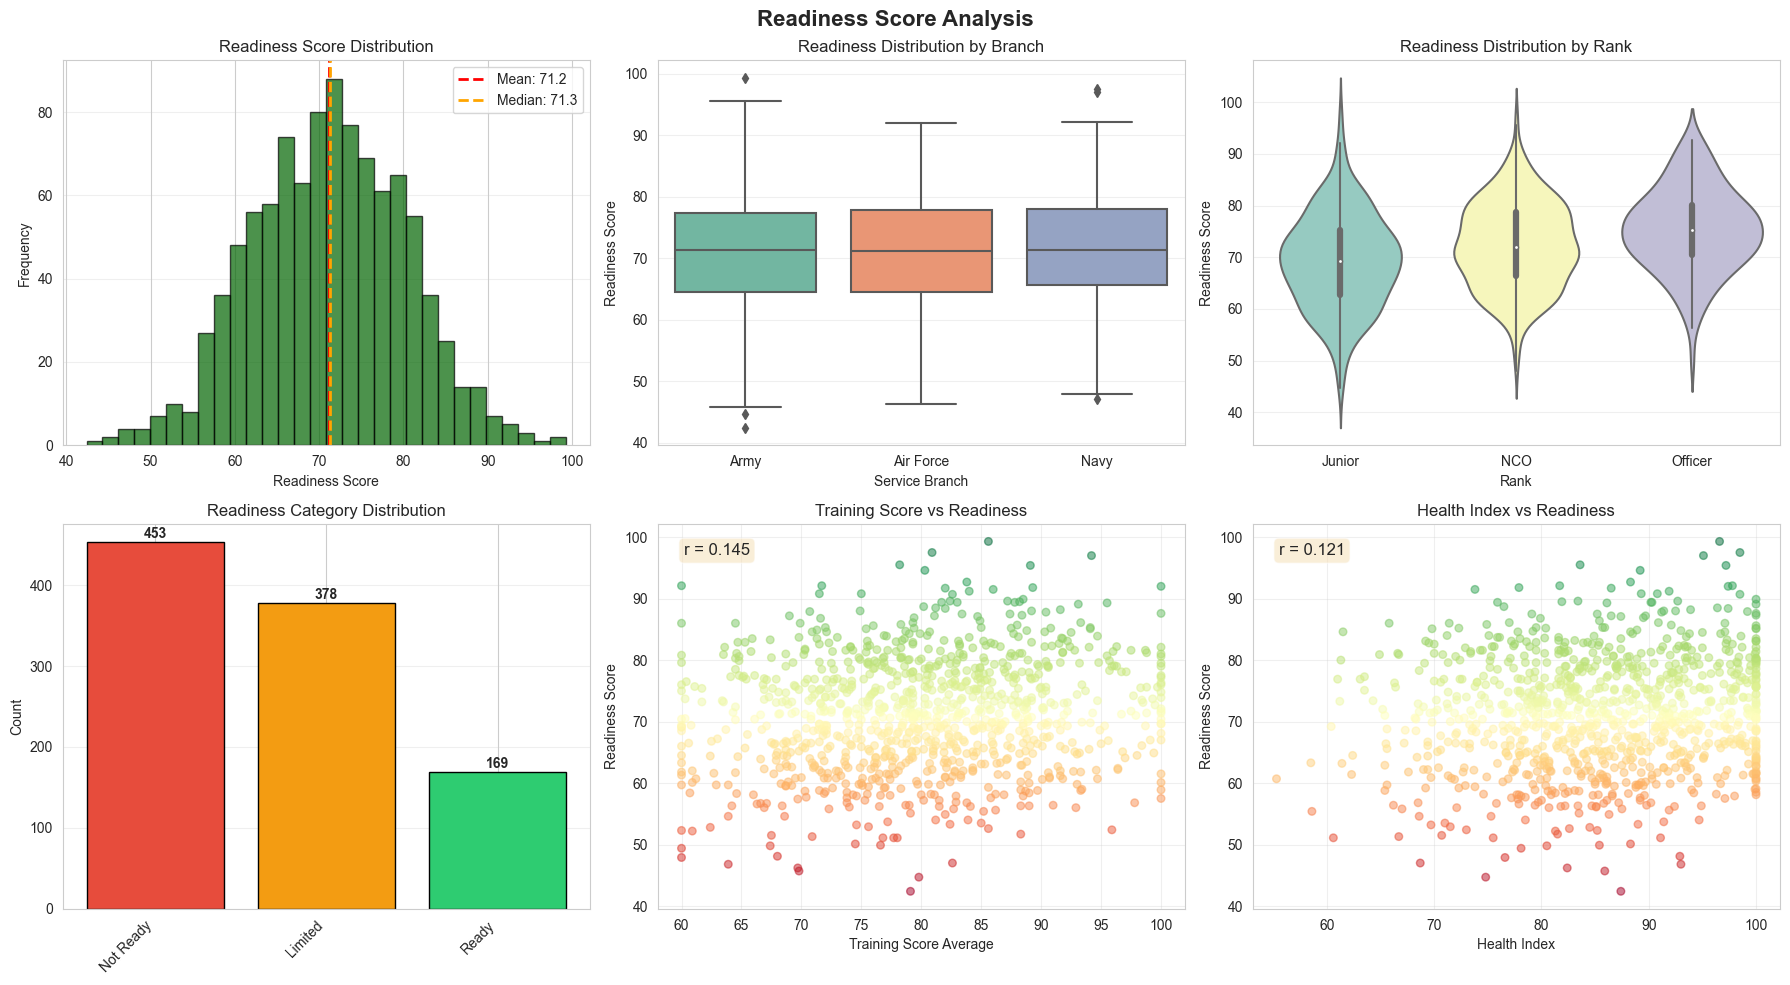

Readiness analysis visualizations saved


In [16]:
# Comprehensive readiness analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Readiness Score Analysis', fontsize=16, fontweight='bold')

# 1. Readiness score distribution
axes[0, 0].hist(df['readiness_score'], bins=30, color='darkgreen', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['readiness_score'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {df["readiness_score"].mean():.1f}')
axes[0, 0].axvline(df['readiness_score'].median(), color='orange', linestyle='--', 
                   linewidth=2, label=f'Median: {df["readiness_score"].median():.1f}')
axes[0, 0].set_xlabel('Readiness Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Readiness Score Distribution')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Readiness by service branch
sns.boxplot(data=df, x='service_branch', y='readiness_score', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_xlabel('Service Branch')
axes[0, 1].set_ylabel('Readiness Score')
axes[0, 1].set_title('Readiness Distribution by Branch')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Readiness by rank
rank_order = ['Junior', 'NCO', 'Officer']
df['rank_ordered'] = pd.Categorical(df['rank'], categories=rank_order, ordered=True)
df_plot = df.sort_values('rank_ordered')
sns.violinplot(data=df_plot, x='rank_ordered', y='readiness_score', ax=axes[0, 2], palette='Set3')
axes[0, 2].set_xlabel('Rank')
axes[0, 2].set_ylabel('Readiness Score')
axes[0, 2].set_title('Readiness Distribution by Rank')
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. Readiness category distribution
readiness_cat = df['readiness_category'].value_counts()
colors_readiness = ['#e74c3c', '#f39c12', '#2ecc71']
axes[1, 0].bar(range(len(readiness_cat)), readiness_cat.values, 
               color=colors_readiness, edgecolor='black')
axes[1, 0].set_xticks(range(len(readiness_cat)))
axes[1, 0].set_xticklabels(readiness_cat.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Readiness Category Distribution')
for i, v in enumerate(readiness_cat.values):
    axes[1, 0].text(i, v + 5, str(v), ha='center', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Training score vs readiness
axes[1, 1].scatter(df['training_score_average'], df['readiness_score'], 
                   alpha=0.5, c=df['readiness_score'], cmap='RdYlGn', s=30)
axes[1, 1].set_xlabel('Training Score Average')
axes[1, 1].set_ylabel('Readiness Score')
axes[1, 1].set_title('Training Score vs Readiness')
axes[1, 1].grid(alpha=0.3)

# Add correlation coefficient
corr = df[['training_score_average', 'readiness_score']].corr().iloc[0, 1]
axes[1, 1].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[1, 1].transAxes,
                fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 6. Health index vs readiness
axes[1, 2].scatter(df['health_index'], df['readiness_score'], 
                   alpha=0.5, c=df['readiness_score'], cmap='RdYlGn', s=30)
axes[1, 2].set_xlabel('Health Index')
axes[1, 2].set_ylabel('Readiness Score')
axes[1, 2].set_title('Health Index vs Readiness')
axes[1, 2].grid(alpha=0.3)

# Add correlation coefficient
corr = df[['health_index', 'readiness_score']].corr().iloc[0, 1]
axes[1, 2].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[1, 2].transAxes,
                fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(config.FIGURES_DIR / 'eda_readiness_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Readiness analysis visualizations saved")

# Correlation Analysis


Analyzing correlations for 30 numeric features...


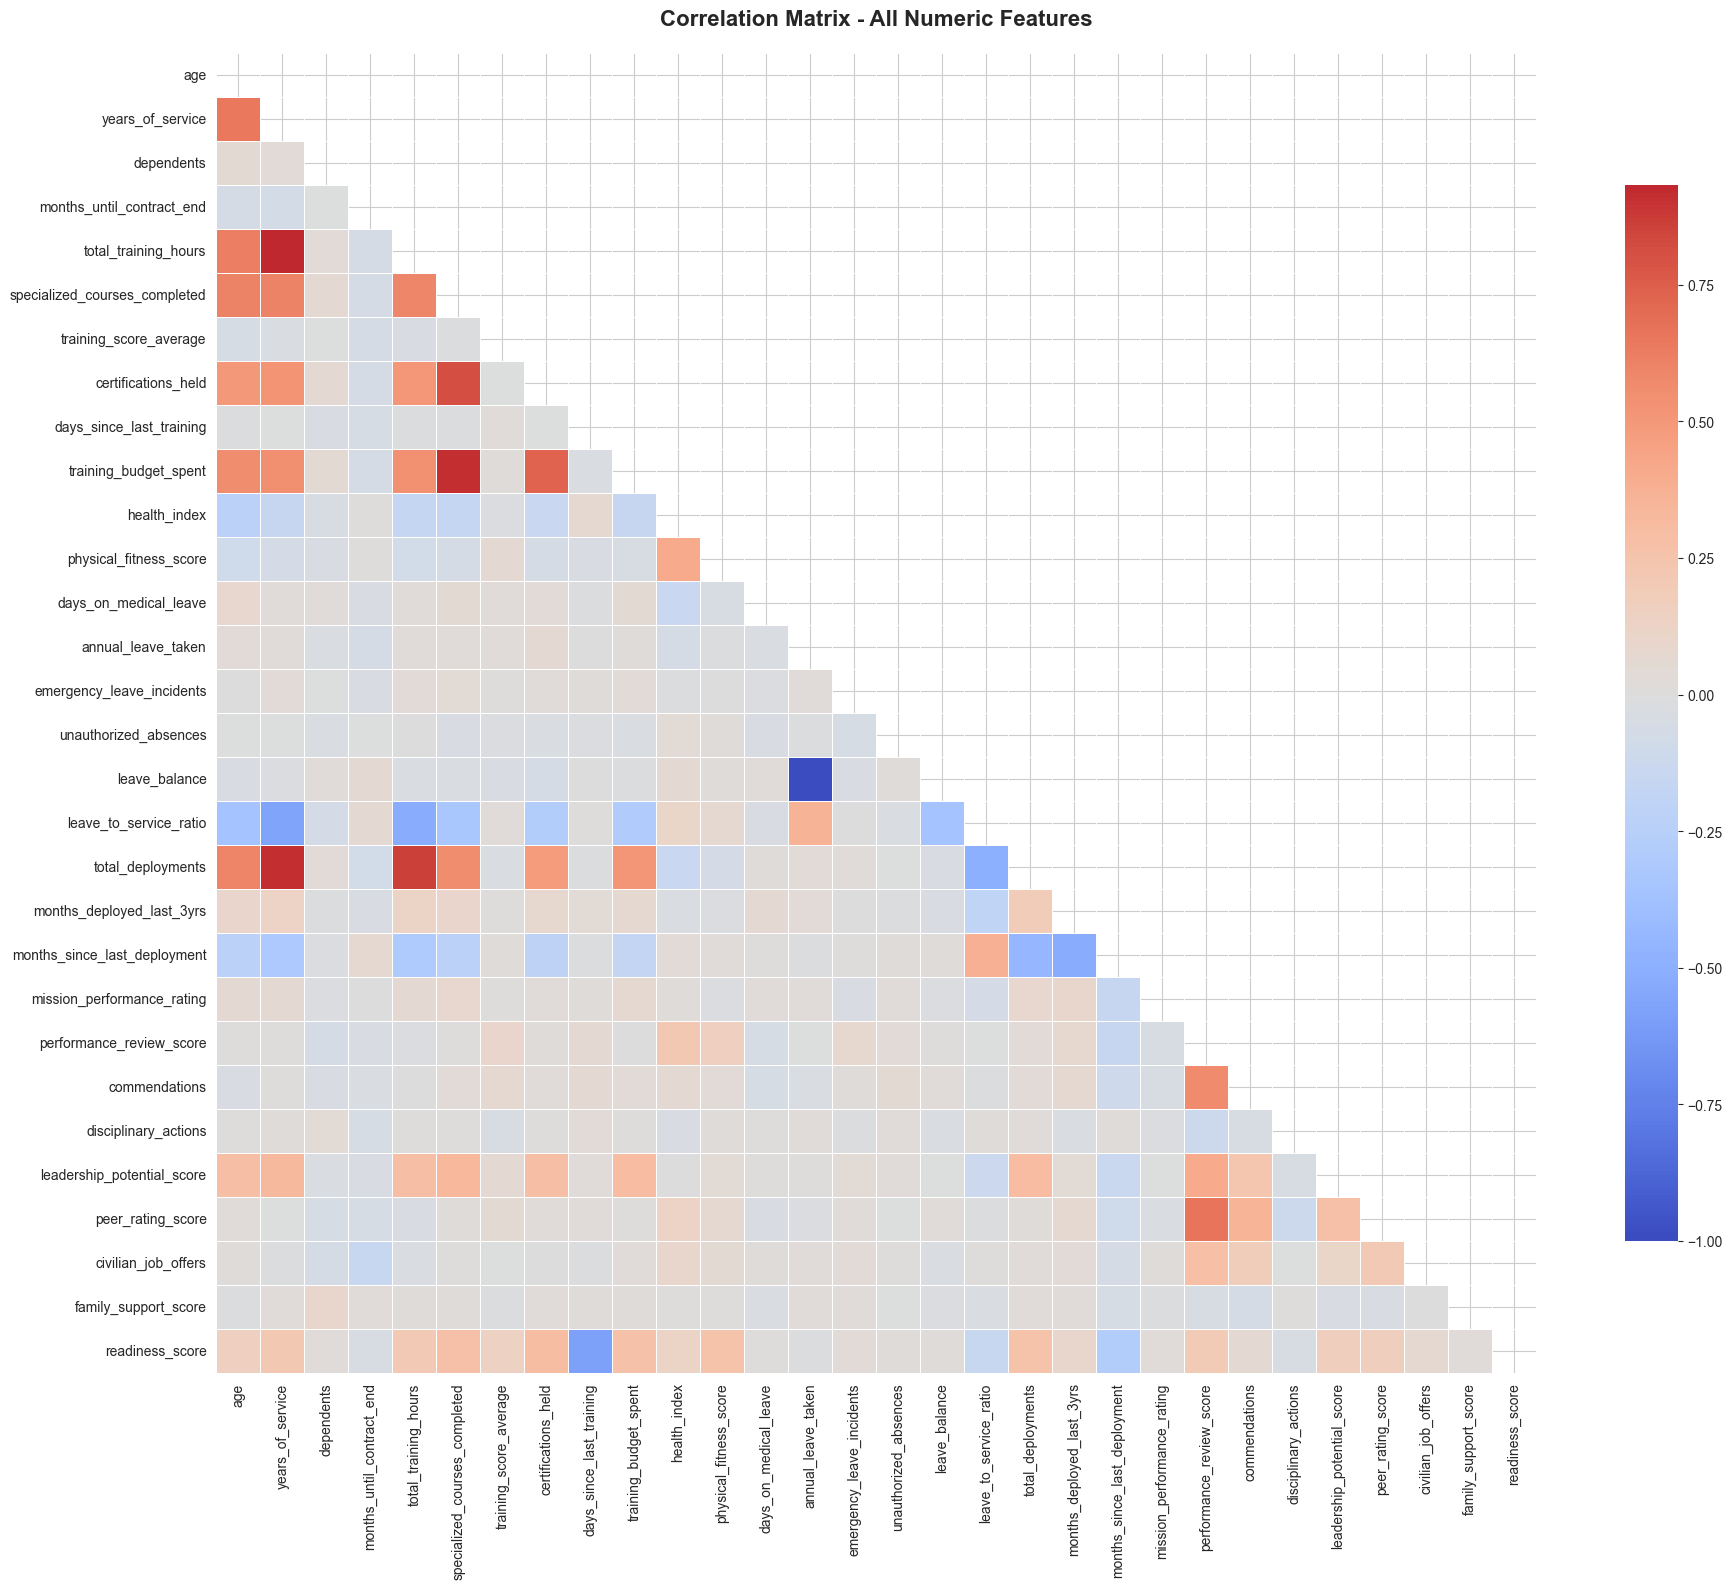

Correlation matrix saved


In [17]:
# Select numeric features for correlation analysis
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove ID and datetime-derived features
exclude_features = ['personnel_id', 'attrition_risk_score']
numeric_features = [f for f in numeric_features if f not in exclude_features]

print(f"\nAnalyzing correlations for {len(numeric_features)} numeric features...")

# Calculate correlation matrix
corr_matrix = df[numeric_features].corr()

# Create correlation heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Numeric Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(config.FIGURES_DIR / 'eda_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation matrix saved")


Top 15 Features Correlated with Readiness Score:
------------------------------------------------------------
certifications_held                     :  0.305
specialized_courses_completed           :  0.273
training_budget_spent                   :  0.262
physical_fitness_score                  :  0.261
total_deployments                       :  0.256
years_of_service                        :  0.223
total_training_hours                    :  0.209
performance_review_score                :  0.199
leadership_potential_score              :  0.168
peer_rating_score                       :  0.163
age                                     :  0.159
training_score_average                  :  0.145
health_index                            :  0.121
months_deployed_last_3yrs               :  0.091
civilian_job_offers                     :  0.067


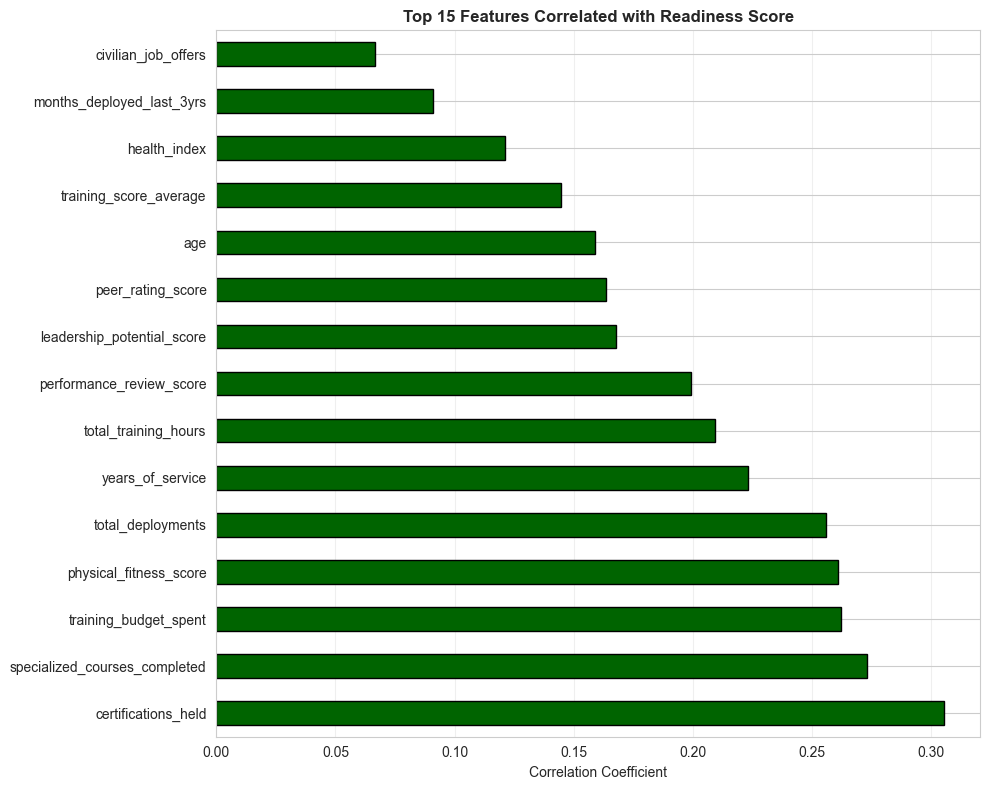


Top readiness correlations saved


In [19]:
# Find top correlations with readiness_score
readiness_corr = corr_matrix['readiness_score'].sort_values(ascending=False)
readiness_corr = readiness_corr[readiness_corr.index != 'readiness_score']  # Remove self-correlation

print("\nTop 15 Features Correlated with Readiness Score:")
print("-" * 60)
top_readiness = readiness_corr.head(15)
for feature, corr in top_readiness.items():
    print(f"{feature:40s}: {corr:6.3f}")

# Visualize top correlations
plt.figure(figsize=(10, 8))
top_readiness.plot(kind='barh', color='darkgreen', edgecolor='black')
plt.xlabel('Correlation Coefficient')
plt.title('Top 15 Features Correlated with Readiness Score', fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(config.FIGURES_DIR / 'eda_readiness_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop readiness correlations saved")

In [20]:
# Identify multicollinearity (highly correlated feature pairs)
print("\nHighly Correlated Feature Pairs (|r| > 0.8):")
print("-" * 60)

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
    high_corr_df = high_corr_df.sort_values('Correlation', key=abs, ascending=False)
    print(high_corr_df.to_string(index=False))
    print(f"\nFound {len(high_corr_pairs)} highly correlated pairs - consider removing one from each pair during modeling")
else:
    print("No highly correlated pairs found (|r| > 0.8)")


Highly Correlated Feature Pairs (|r| > 0.8):
------------------------------------------------------------
                    Feature 1             Feature 2  Correlation
           annual_leave_taken         leave_balance    -1.000000
             years_of_service  total_training_hours     0.933377
specialized_courses_completed training_budget_spent     0.916415
             years_of_service     total_deployments     0.913743
         total_training_hours     total_deployments     0.861859
specialized_courses_completed   certifications_held     0.814051

Found 6 highly correlated pairs - consider removing one from each pair during modeling


# Training & Development Analysis

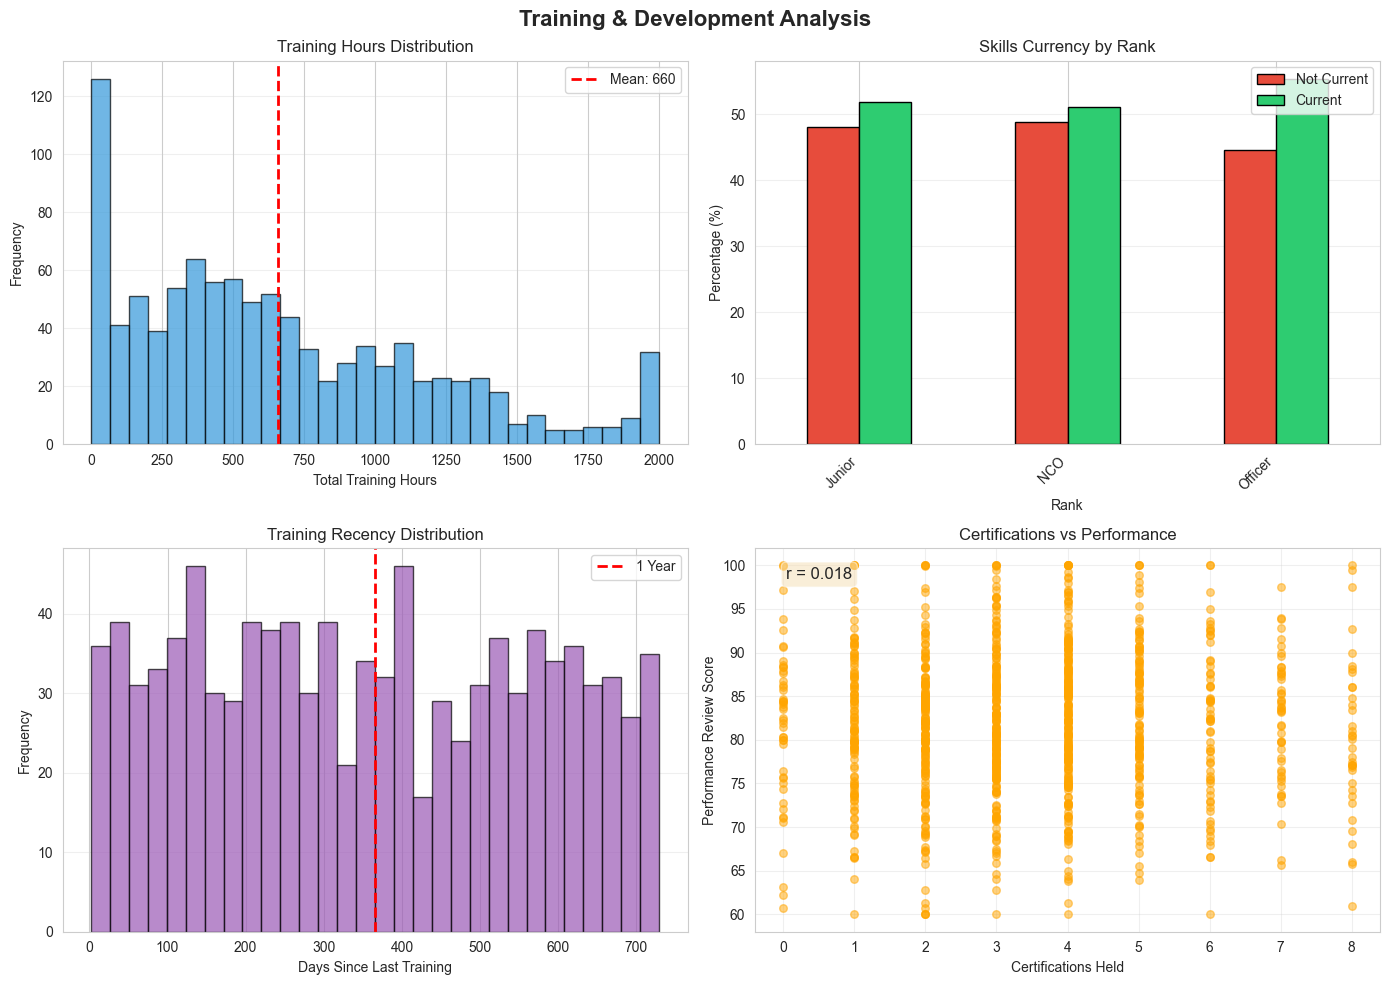

Training analysis saved


In [21]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Training & Development Analysis', fontsize=16, fontweight='bold')

# 1. Training hours distribution
axes[0, 0].hist(df['total_training_hours'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['total_training_hours'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {df["total_training_hours"].mean():.0f}')
axes[0, 0].set_xlabel('Total Training Hours')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Training Hours Distribution')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Skills currency by rank
skills_current = pd.crosstab(df['rank'], df['skills_current'], normalize='index') * 100
skills_current.plot(kind='bar', ax=axes[0, 1], color=['#e74c3c', '#2ecc71'], edgecolor='black')
axes[0, 1].set_ylabel('Percentage (%)')
axes[0, 1].set_xlabel('Rank')
axes[0, 1].set_title('Skills Currency by Rank')
axes[0, 1].legend(['Not Current', 'Current'])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Days since last training distribution
axes[1, 0].hist(df['days_since_last_training'], bins=30, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(365, color='red', linestyle='--', linewidth=2, label='1 Year')
axes[1, 0].set_xlabel('Days Since Last Training')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Training Recency Distribution')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Certifications vs performance
axes[1, 1].scatter(df['certifications_held'], df['performance_review_score'], 
                   alpha=0.5, c='orange', s=30)
axes[1, 1].set_xlabel('Certifications Held')
axes[1, 1].set_ylabel('Performance Review Score')
axes[1, 1].set_title('Certifications vs Performance')
axes[1, 1].grid(alpha=0.3)

# Add correlation
corr = df[['certifications_held', 'performance_review_score']].corr().iloc[0, 1]
axes[1, 1].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[1, 1].transAxes,
                fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(config.FIGURES_DIR / 'eda_training_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Training analysis saved")

# Health & Deployment Analysis


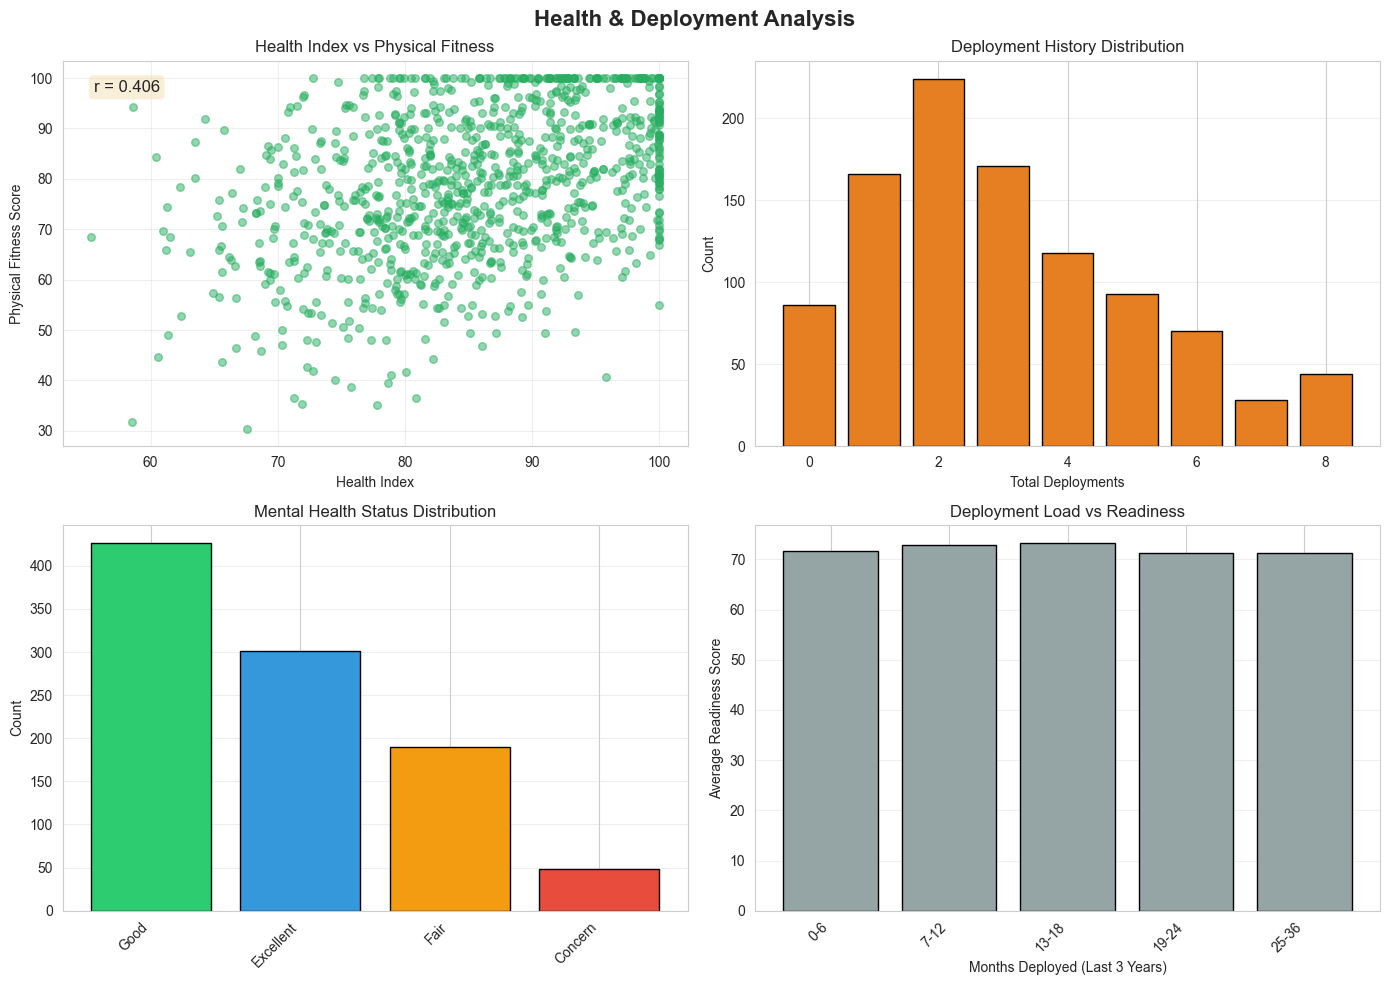

Health & deployment analysis saved


In [22]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Health & Deployment Analysis', fontsize=16, fontweight='bold')

# 1. Health index vs physical fitness
axes[0, 0].scatter(df['health_index'], df['physical_fitness_score'], 
                   alpha=0.5, c='#27ae60', s=30)
axes[0, 0].set_xlabel('Health Index')
axes[0, 0].set_ylabel('Physical Fitness Score')
axes[0, 0].set_title('Health Index vs Physical Fitness')
axes[0, 0].grid(alpha=0.3)

corr = df[['health_index', 'physical_fitness_score']].corr().iloc[0, 1]
axes[0, 0].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[0, 0].transAxes,
                fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Deployment history distribution
deployment_counts = df['total_deployments'].value_counts().sort_index()
axes[0, 1].bar(deployment_counts.index, deployment_counts.values, 
               color='#e67e22', edgecolor='black')
axes[0, 1].set_xlabel('Total Deployments')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Deployment History Distribution')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Mental health status distribution
mental_health_counts = df['mental_health_status'].value_counts()
colors_mental = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
axes[1, 0].bar(range(len(mental_health_counts)), mental_health_counts.values,
               color=colors_mental[:len(mental_health_counts)], edgecolor='black')
axes[1, 0].set_xticks(range(len(mental_health_counts)))
axes[1, 0].set_xticklabels(mental_health_counts.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Mental Health Status Distribution')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Deployment fatigue (months deployed vs readiness)
# Create bins for deployment months
df['deployment_bin'] = pd.cut(df['months_deployed_last_3yrs'], 
                               bins=[0, 6, 12, 18, 24, 36], 
                               labels=['0-6', '7-12', '13-18', '19-24', '25-36'])
deployment_readiness = df.groupby('deployment_bin', observed=True)['readiness_score'].mean()
axes[1, 1].bar(range(len(deployment_readiness)), deployment_readiness.values,
               color='#95a5a6', edgecolor='black')
axes[1, 1].set_xticks(range(len(deployment_readiness)))
axes[1, 1].set_xticklabels(deployment_readiness.index, rotation=45, ha='right')
axes[1, 1].set_xlabel('Months Deployed (Last 3 Years)')
axes[1, 1].set_ylabel('Average Readiness Score')
axes[1, 1].set_title('Deployment Load vs Readiness')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(config.FIGURES_DIR / 'eda_health_deployment.png', dpi=300, bbox_inches='tight')
plt.show()

print("Health & deployment analysis saved")


Missing Data Summary:
------------------------------------------------------------
                       Feature  Missing Count  Missing %
         combat_exposure_level            673       67.3
             peer_rating_score            140       14.0
          family_support_score            111       11.1
                attrition_risk             93        9.3
               deployment_type             86        8.6
                deployment_bin             86        8.6
         days_on_medical_leave             75        7.5
wellness_program_participation             70        7.0
     emergency_leave_incidents             70        7.0
           civilian_job_offers             47        4.7
          mental_health_status             35        3.5


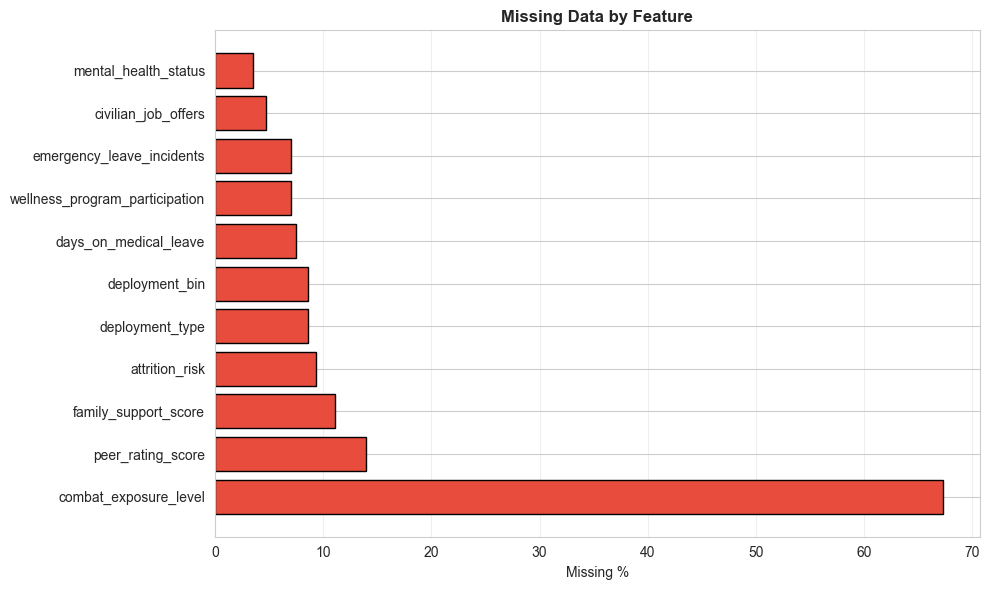

In [25]:
# Calculate missing data statistics
missing_stats = df.isnull().sum()
missing_stats = missing_stats[missing_stats > 0].sort_values(ascending=False)
missing_pct = (missing_stats / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Feature': missing_stats.index,
    'Missing Count': missing_stats.values,
    'Missing %': missing_pct.values
})

print("\nMissing Data Summary:")
print("-" * 60)
print(missing_df.to_string(index=False))

# Visualize missing data
if len(missing_df) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(missing_df)), missing_df['Missing %'].values, color='#e74c3c', edgecolor='black')
    plt.yticks(range(len(missing_df)), missing_df['Feature'].values)
    plt.xlabel('Missing %')
    plt.title('Missing Data by Feature', fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\n No missing data found!")